# <center>Simulacion</center>

## Resumen

Este trabajo tiene como objetivo analizar el efecto que tiene utilizar cada tipo de medida de tendencia central como valor de referencia para generar un valor. Esto ve un caso concreto cuando existe un producto en un mercardo cuyo precio puede variar y existe un ente que informa el valor real de ese producto aplicando una medida de tendencia central a un conjunto grande de datos. Como resultado se obtuvo que cuando se usan la media y la mediana las fluctuaciones son menos bruscas que cuando se usa la moda; siendo preferible entre estas 2 la mediana.

## Primer tipo de simulación

La primera simulación es sencilla, se generan n valores aleatorios que distribuyen normal con respecto a cierto valor y a continuación se generan otros n valores tomando como media el resultado de aplicar una medida de tendencia central al conjunto anterior

In [1]:
%matplotlib inline
from numpy.random import normal
from random import uniform
import matplotlib
from matplotlib import pyplot as plt
from statistics import mean, median, median_grouped, mode, variance
from math import floor, ceil, sqrt
from matplotlib.pyplot import title
import math


def gen_normal_secuence_int(loc = 0, var = 1, lenght = 10):
    for i in range(0,lenght):
        yield round(normal(loc,var))

def group_data(data, lenght):
    low = floor(min(data))
    high = ceil(max(data))
    classes = [0]*(high - low)
    for item in data:
        if ceil(item) == high:
            classes[len(classes) - 1] += 1
        else:
            classes[floor((item - low)/lenght)] += 1
    return classes, low, high 

def get_index_max(classes):
    index = 0
    current_max = classes[0]
    for i in range(len(classes)):
        if(classes[i] > current_max):
            current_max = classes[i]
            index = i
    return index

def get_acum_frec(classes):
    acum = 0
    result = [0]*(len(classes))
    for i in range(len(classes)):
        acum += classes[i]
        result[i] = acum
    return result , acum

def get_pass_middle_index(acum_frec, total):
    for i in range(len(acum_frec)):
        if(acum_frec[i] > total/2):
            return i


def my_mode(data, len_of_groups = 1):
    #agrupar
    classes, min_value, _ = group_data(data,len_of_groups)
    modal_index = get_index_max(classes)
    lim_inf = min_value + modal_index*len_of_groups
    n_anterior = classes[modal_index - 1] if (modal_index - 1 > 0) else 0
    n_posterior = classes[modal_index + 1] if (modal_index + 1 < len(classes)) else 0
    return lim_inf + ((classes[modal_index] - n_anterior)/((classes[modal_index] - n_anterior)  + (classes[modal_index] - n_posterior)))*len_of_groups
    
def my_median(data, len_of_groups = 1):
    classes, min_value, _ = group_data(data,len_of_groups)
    acum_frec, total = get_acum_frec(classes)    
    middle_index = get_pass_middle_index(acum_frec, total)
    middle_frec = acum_frec[middle_index]
    prev_middle_frec = 0 if middle_index == 0 else acum_frec[middle_index - 1]
    return min_value + middle_index*len_of_groups + ((total/2 - prev_middle_frec)/(middle_frec - prev_middle_frec))*len_of_groups

def simulate_with_normal(days = 100, peoples = 100, sequence_generator = normal,initial_value = 20 ,func = mean):
    y_data = [initial_value]
    for i in range(1,days):
        y_data.append(func(sequence_generator(y_data[i-1],5,peoples)))
    return y_data
   



In [2]:
%matplotlib inline
from numpy.random import normal
from random import uniform
import matplotlib
from matplotlib import pyplot as plt
from statistics import mean, median, median_grouped, mode, variance
from math import floor, ceil, sqrt
from matplotlib.pyplot import title
import math


def gen_normal_secuence_int(loc = 0, var = 1, lenght = 10):
    for i in range(0,lenght):
        yield round(normal(loc,var))

def group_data(data, lenght):
    low = floor(min(data))
    high = ceil(max(data))
    classes = [0]*(high - low)
    for item in data:
        if ceil(item) == high:
            classes[len(classes) - 1] += 1
        else:
            classes[floor((item - low)/lenght)] += 1
    return classes, low, high 

def get_index_max(classes):
    index = 0
    current_max = classes[0]
    for i in range(len(classes)):
        if(classes[i] > current_max):
            current_max = classes[i]
            index = i
    return index

def get_acum_frec(classes):
    acum = 0
    result = [0]*(len(classes))
    for i in range(len(classes)):
        acum += classes[i]
        result[i] = acum
    return result , acum

def get_pass_middle_index(acum_frec, total):
    for i in range(len(acum_frec)):
        if(acum_frec[i] > total/2):
            return i


def my_mode(data, len_of_groups = 1):
    #agrupar
    classes, min_value, _ = group_data(data,len_of_groups)
    modal_index = get_index_max(classes)
    lim_inf = min_value + modal_index*len_of_groups
    n_anterior = classes[modal_index - 1] if (modal_index - 1 > 0) else 0
    n_posterior = classes[modal_index + 1] if (modal_index + 1 < len(classes)) else 0
    return lim_inf + ((classes[modal_index] - n_anterior)/((classes[modal_index] - n_anterior)  + (classes[modal_index] - n_posterior)))*len_of_groups
    
def my_median(data, len_of_groups = 1):
    classes, min_value, _ = group_data(data,len_of_groups)
    acum_frec, total = get_acum_frec(classes)    
    middle_index = get_pass_middle_index(acum_frec, total)
    middle_frec = acum_frec[middle_index]
    prev_middle_frec = 0 if middle_index == 0 else acum_frec[middle_index - 1]
    return min_value + middle_index*len_of_groups + ((total/2 - prev_middle_frec)/(middle_frec - prev_middle_frec))*len_of_groups

def simulate_with_normal(days = 100, peoples = 100, sequence_generator = normal,initial_value = 20 ,func = mean):
    y_data = [initial_value]
    for i in range(1,days):
        y_data.append(func(sequence_generator(y_data[i-1],5,peoples)))
    return y_data
   



# Primeros resultados
A continuación se muestran los primeros resultados de la simulación antes descrita haciendo una diferenciación en el caso de los agrupados y los discretos, pues la forma de calcular la moda y la mediana varía en dependencia de esto

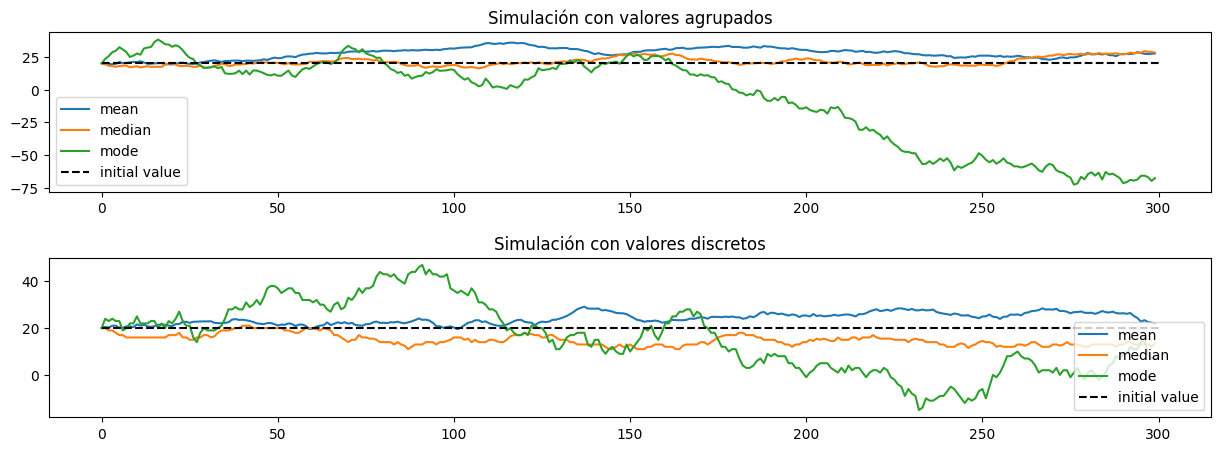

In [3]:
matplotlib.rcParams['figure.figsize'] = [15,5]
x = range(300)
plt.subplot2grid((7,1),(0,0),3,1)
title("Simulación con valores agrupados")
y_mean = simulate_with_normal(days = 300,func = mean)
y_median = simulate_with_normal(days = 300,func = my_median)
y_mode = simulate_with_normal(days = 300,func = my_mode)
plt.plot(x,y_mean, label = "mean")
plt.plot(x,y_median, label = "median")
plt.plot(x,y_mode, label = "mode")
plt.hlines(20,0,300, linestyles="dashed", color = "black", label = "initial value")
plt.legend()
plt.subplot2grid((7,1),(4,0),3,1)
title("Simulación con valores discretos")
y_mean = simulate_with_normal(days = 300, sequence_generator= gen_normal_secuence_int ,func = mean)
y_median = simulate_with_normal(days = 300, sequence_generator= gen_normal_secuence_int ,func = median)
y_mode = simulate_with_normal(days = 300, sequence_generator= gen_normal_secuence_int ,func = mode)
plt.plot(x,y_mean, label = "mean")
plt.plot(x,y_median, label = "median")
plt.plot(x,y_mode, label = "mode")
plt.hlines(20,0,300, linestyles="dashed", color = "black", label = "initial value")
plt.legend()
plt.show()

Como se puede notar la moda tiende a alejarse más del valor original que las otras medidas de tendencia central, pero esto puede ser una casualidad debido a los valores generados aleatoriamente.

Para comprobar la hipótesis que tenemos sobre la moda vamos a analizar cuan diferentes pueden ser dos simulaciones en un mismo momento(índice). Para esto vamos a realizar 100 simulaciones y vamos a seleccionar las dos que maximicen la diferencia de sus valores en un mismo momento

In [4]:
#Crear un método específico para que encuentre la mayor diferencia entre todos los elementos de un mismo indice en un conjunto de listas de valores
def max_dif_per_col(list_of_list):
    min_len = min([len(list) for list in list_of_list])
    dif = []
    for j in range(min_len):
        min_index = -1
        max_index = -1
        min_value = list_of_list[0][j]
        max_value = list_of_list[0][j]
        for i in range(len(list_of_list)):
            if(list_of_list[i][j] < min_value):
                min_value = list_of_list[i][j]
                min_index = i
            if(list_of_list[i][j] > max_value):
                max_value = list_of_list[i][j]
                max_index = i
        dif.append((min_index,max_index, max_value - min_value))
    return dif

def get_max_dif_simulation(data):
    dif = max_dif_per_col(data)
    max_index = get_index_max([item[2] for item in dif])
    min_list = data[dif[max_index][0]]
    max_list = data[dif[max_index][1]]
    dif_value = dif[max_index][2]
    return min_list,max_list,dif_value,max_index

def plot_dif(min_list,max_list = None,dif_value = None,max_index = 10,original = 20, title = "dif"):
    x = range(len(min_list))
    if not min_list == None: plt.plot(x,min_list, label = "min_mode")
    if not max_list == None: plt.plot(x,max_list, label = "max_mode")
    min_value = min(original,min_list[max_index])
    max_value = max(original,min_list[max_index])
    if not max_list == None:
        min_value = min_list[max_index]
        max_value = max_list[max_index]

    plt.vlines(max_index,min_value,max_value, label = "dif",linestyles="dashed",color = "red")
    plt.hlines(original,0,len(min_list),linestyles= "dashed",color = "black", label = "initial value")
    plt.title(title + " (" + str(round(dif_value,2)) + ")") 
    plt.legend()
    plt.show()

Moda

In [5]:
#generar 100 simulaciones con la moda y calcular la diferencia(agrupados)
data_mode_agrupados = []
for _ in range(100):
    data_mode_agrupados.append(simulate_with_normal(300,100,normal,20,my_mode))
min_list_mode_agrupados,max_list_mode_agrupados,dif_mode_agrupados,max_index_mode_agrupados = get_max_dif_simulation(data_mode_agrupados)

In [6]:
#generar 100 simulaciones con la moda y calcular la diferencia(discreto)
data_mode_discretos = []
for _ in range(100):
    data_mode_discretos.append(simulate_with_normal(300,100,gen_normal_secuence_int,20,mode))
min_list_mode_discretos,max_list_mode_discretos,dif_mode_discretos,max_index_mode_discretos = get_max_dif_simulation(data_mode_discretos)

Moda (agrupados)
min value in 299: -190.0
max value in 299: -73.4


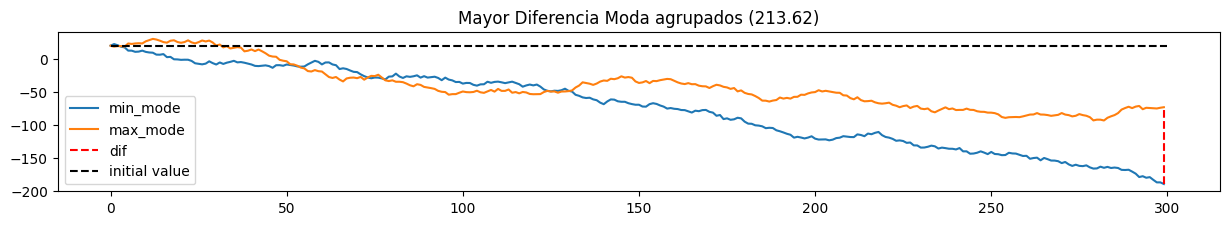

Moda (discretos)
min value in 282: -60
max value in 282: 133


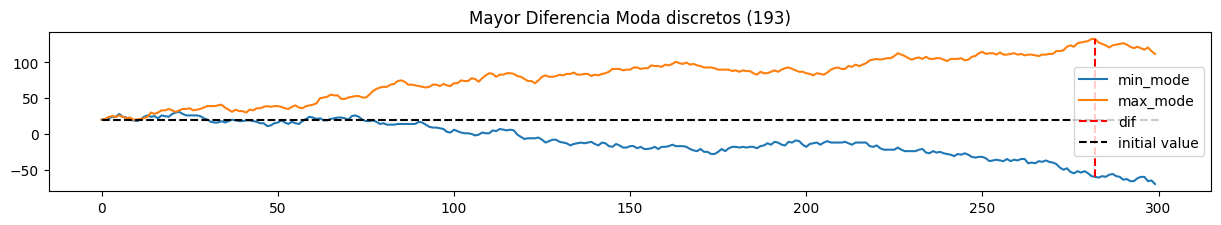

In [7]:
plt.subplot2grid((7,1),(0,0),3,1)
print("Moda (agrupados)")
print("min value in " + str(max_index_mode_agrupados) + ": " + str(round(min_list_mode_agrupados[max_index_mode_agrupados],2)))
print("max value in " + str(max_index_mode_agrupados) + ": " + str(round(max_list_mode_agrupados[max_index_mode_agrupados],2)))
plot_dif(min_list_mode_agrupados,max_list_mode_agrupados,dif_mode_agrupados,max_index_mode_agrupados,20, title = "Mayor Diferencia Moda agrupados")

plt.subplot2grid((7,1),(3,0),3,1)
print("Moda (discretos)")
print("min value in " + str(max_index_mode_discretos) + ": " + str(round(min_list_mode_discretos[max_index_mode_discretos],2)))
print("max value in " + str(max_index_mode_discretos) + ": " + str(round(max_list_mode_discretos[max_index_mode_discretos],2)))
plot_dif(min_list_mode_discretos,max_list_mode_discretos,dif_mode_discretos,max_index_mode_discretos,20, title = "Mayor Diferencia Moda discretos")


meana

In [8]:
#Generar 100 simulaciones con la mediana con datos agrupados y calcular máximas diferecias

data_median_agrupados = []
for _ in range(100):
    data_median_agrupados.append(simulate_with_normal(300,100,normal,20,my_median))
min_list_median_agrupados,max_list_median_agrupados,dif_median_agrupados,max_index_median_agrupados = get_max_dif_simulation(data_median_agrupados)

In [9]:
#Generar 100 simulaciones con la mediana con datos discretos y calcular la diferencia
data_median_discretos = []
for _ in range(100):
    data_median_discretos.append(simulate_with_normal(300,100,gen_normal_secuence_int,20,median))
min_list_median_discretos,max_list_median_discretos,dif_median_discretos,max_index_median_discretos = get_max_dif_simulation(data_median_discretos)

Mediana (agrupados)
min value in 296: -6.2
max value in 296: 49.64


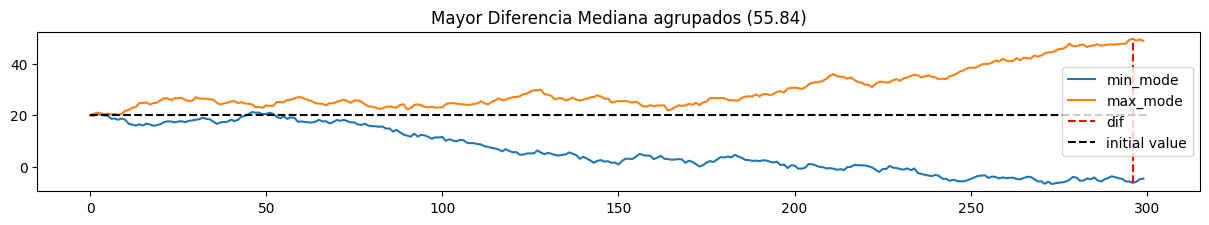

Mediana (Discretos)
min value in 287: -10.0
max value in 287: 53.0


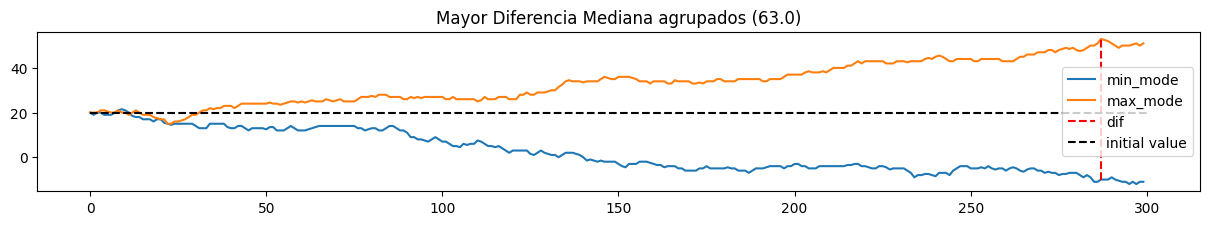

In [10]:
plt.subplot2grid((7,1),(0,0),3,1)
print("Mediana (agrupados)")
print("min value in " + str(max_index_median_agrupados) + ": " + str(round(min_list_median_agrupados[max_index_median_agrupados],2)))
print("max value in " + str(max_index_median_agrupados) + ": " + str(round(max_list_median_agrupados[max_index_median_agrupados],2)))
plot_dif(min_list_median_agrupados,max_list_median_agrupados,dif_median_agrupados,max_index_median_agrupados,20, title = "Mayor Diferencia Mediana agrupados")

plt.subplot2grid((7,1),(3,0),3,1)
print("Mediana (Discretos)")
print("min value in " + str(max_index_median_discretos) + ": " + str(round(min_list_median_discretos[max_index_median_discretos],2)))
print("max value in " + str(max_index_median_discretos) + ": " + str(round(max_list_median_discretos[max_index_median_discretos],2)))
plot_dif(min_list_median_discretos,max_list_median_discretos,dif_median_discretos,max_index_median_discretos,20, title = "Mayor Diferencia Mediana agrupados")

Media

In [11]:
#Generar 100 simulaciones con la media y calcular las máximas diferencias 
data_mean= []
for _ in range(100):
    data_mean.append(simulate_with_normal(300,100,normal,20,mean))
min_list_mean,max_list_mean,dif_mean,max_index_mean = get_max_dif_simulation(data_mean)

Mean
min value in 299: 0.08
max value in 299: 47.54


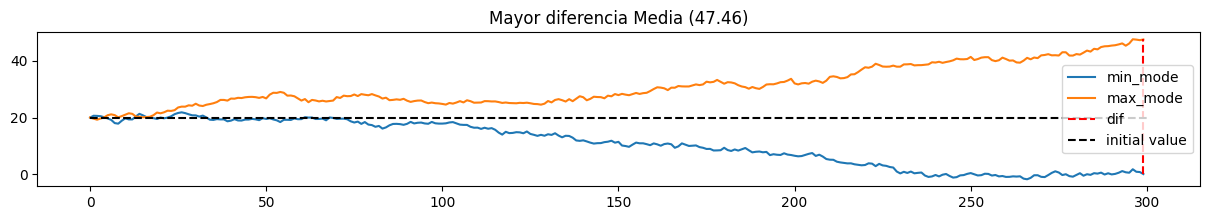

In [12]:
matplotlib.rcParams['figure.figsize'] = [15,2]
print("Mean")
print("min value in " + str(max_index_mean) + ": " + str(round(min_list_mean[max_index_mean],2)))
print("max value in " + str(max_index_mean) + ": " + str(round(max_list_mean[max_index_mean],2)))
plot_dif(min_list_mean,max_list_mean,dif_mean,max_index_mean,20, title = "Mayor diferencia Media")

Otra prueba que se puede hacer es de esas 100 simulaciones encontrar la mayor desviación con el valor orignial

In [13]:
def max_dif_original_per_col(list_of_list, original):
    min_len = min([len(list) for list in list_of_list])
    iter = range(min_len)
    dif = []
    for j in iter:
        col_dif = [abs(list[j] - original) for list in list_of_list]
        index_max = get_index_max(col_dif)
        dif.append((index_max,col_dif[index_max]))
    return dif

def get_max_dif_original(data,original):
    dif = max_dif_original_per_col(data,original)
    max_dif_index = get_index_max([item[1] for item in dif])
    max_dif_list = data[dif[max_dif_index][0]]
    max_dif_value = dif[max_dif_index][1]
    return max_dif_list, max_dif_value, max_dif_index
    

Moda agrupados y discretos

In [14]:
#Moda agrupados
ori_dif_mode_agrupados_list,ori_dif_mode_agrupados_value,ori_dif_mode_agrupados_index = get_max_dif_original(data_mode_agrupados,20)

In [15]:
ori_dif_mode_discretos_list,ori_dif_mode_discretos_value,ori_dif_mode_discretos_index = get_max_dif_original(data_mode_discretos,20)

Moda (agrupados)
max dif in 299: 210.0


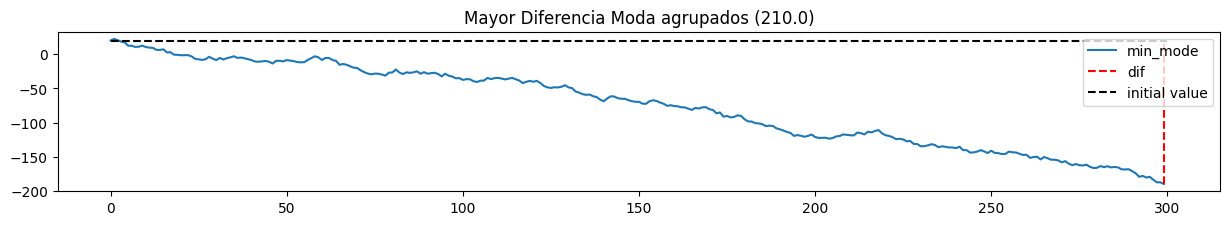

Moda (discretos)
max dif in 281: 113


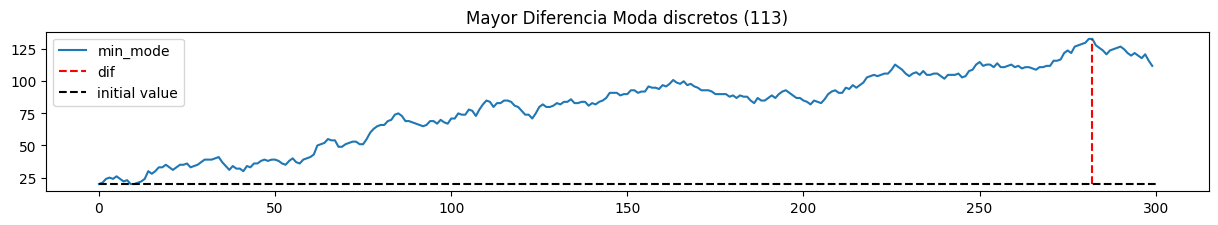

In [16]:
matplotlib.rcParams['figure.figsize'] = [15,5]
plt.subplot2grid((7,1),(0,0),3,1)
print("Moda (agrupados)")
print("max dif in " + str(ori_dif_mode_agrupados_index) + ": " + str(round(ori_dif_mode_agrupados_value,2)))
plot_dif(ori_dif_mode_agrupados_list,None,ori_dif_mode_agrupados_value,max_index_mode_agrupados,20, title = "Mayor Diferencia Moda agrupados")

plt.subplot2grid((7,1),(3,0),3,1)
print("Moda (discretos)")
print("max dif in " + str(ori_dif_mode_discretos_index) + ": " + str(round(ori_dif_mode_discretos_value,2)))
plot_dif(ori_dif_mode_discretos_list,None,ori_dif_mode_discretos_value,max_index_mode_discretos,20, title = "Mayor Diferencia Moda discretos")

Mediana

In [17]:
ori_dif_median_agrupados_list,ori_dif_median_agrupados_value,ori_dif_median_agrupados_index = get_max_dif_original(data_median_agrupados,20)

In [18]:
ori_dif_median_discretos_list,ori_dif_median_discretos_value,ori_dif_median_discretos_index = get_max_dif_original(data_median_discretos,20)

Median (agrupados)
max dif in 296: 29.64


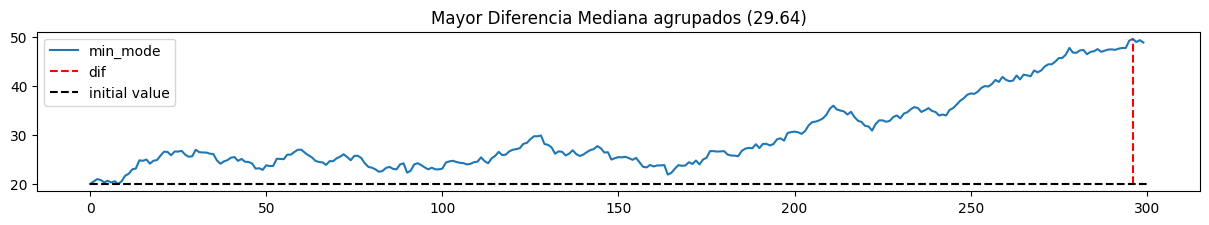

Median (discretos)
max dif in 287: 33.0


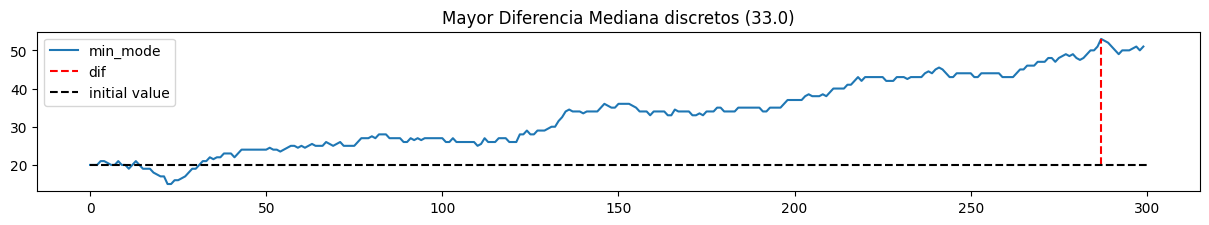

In [19]:
plt.subplot2grid((7,1),(0,0),3,1)
print("Median (agrupados)")
print("max dif in " + str(ori_dif_median_agrupados_index) + ": " + str(round(ori_dif_median_agrupados_value,2)))
plot_dif(ori_dif_median_agrupados_list,None,ori_dif_median_agrupados_value,max_index_median_agrupados,20, title = "Mayor Diferencia Mediana agrupados")

plt.subplot2grid((7,1),(3,0),3,1)
print("Median (discretos)")
print("max dif in " + str(ori_dif_median_discretos_index) + ": " + str(round(ori_dif_median_discretos_value,2)))
plot_dif(ori_dif_median_discretos_list,None,ori_dif_median_discretos_value,max_index_median_discretos,20, title = "Mayor Diferencia Mediana discretos")

Media

In [20]:
ori_dif_mean_list,ori_dif_mean_value,ori_dif_mean_index = get_max_dif_original(data_mean,20)

Mean
max dif in 296: 27.61


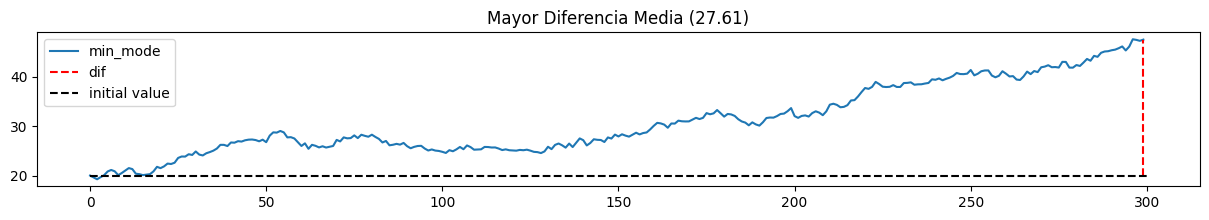

In [21]:
matplotlib.rcParams['figure.figsize'] = [15,2]
print("Mean")
print("max dif in " + str(ori_dif_mean_index) + ": " + str(round(ori_dif_mean_value,2)))
plot_dif(ori_dif_mean_list,None,ori_dif_mean_value,max_index_mean,20, title = "Mayor Diferencia Media")

### Conclusión de la primera simulación
Usar la moda como referencia muestra fluctuaciones muy bruscas del valor y tiende a alejarse mucho más del valor original

## Segunda simulación
Para la segunda simulación se va a optar por una modelación con grafos en la que cada nodo es un negociante y es adyacente a quienes va a tener en cuenta para obtener la información a tener en cuenta para generar su oferta.

La simulación va a ocurrir por turnos que representaran una hora, cada vez que transcurren 24 turnos se considera que pasó un día. Cada día se decide por cada negociante si realiza una oferta o no y a que "hora" realiza la oferta; el hecho de publicar o no es aleatorio y depende de una probabilidad que está asociada al negociante, y la hora del día se decide aleatoriamente tambien y en este caso distribuye uniforme.

Se supone que valor de la oferta que va a realizar un negociante tiene la forma ESTIMACION_DEL_VALOR_REAL + ALGO donde ese ALGO depende de un "factor de convenciencia" asociado al negociante que va a representar si el negociante va a preferir venderla más caro, venderla más barato, o mantenerse alrededor de ese valor. Cada negociante tiene asociado a cada uno de sus adyacentes un valor de fiabilidad que varía en el transcurso de la simulación. La ecuación que utilizamos para modelar esto es:
$$\frac{\sum_{i = 0}^{n}\sum_{j = 0}^{m_i}\frac{f_i}{d_{ij}^2}p_{ij}}{\sum_{i = 0}^{n}\sum_{j = 0}^{m_i}\frac{f_i}{d_{ij}^2}} + \alpha$$

Donde:
* $f_i$ es la fiabilidad asociada al negociante adyacente i-ésimo
* $d_{ij}$ es la cantidad de turnos que han transcurrido desde que el negociante adyacente i-ésimo realizó su oferta j-ésima 
* $p_{ij}$ es el valor que ofertó el negociante adyacente i-ésimo en su oferta j-ésima
* $\alpha$ es un valor aleatorio que distribuye N($c\sigma,\frac{\sigma}{2}$) donde
    * $c$ es el factor de conveniencia mencionado anteriormente
    * $\sigma$ es una desviación estandar calculada teiendo en cuenta todos los valores que conoce el negociante y usando la misma probabilidad que se utilizó para "la esperanza"
    
Después de calcular su estimado del valor real la fiabilidad asociada a cada adyacente se actualiza de la siguiente forma:
$$f_{i + 1} = f_i + (\sigma - |p_l - p_r|)$$
Donde:
* $\sigma$ es el mismo $\sigma$ calculado para generar la oferta
* $p_l$ es el precio de la última oferta que realizó el negociante adyacente al que se le está actualzando la fiabilidad
* $p_r$ es la estimación del valor real realizada para generar la oferta ("la esperanza")

La fiabilidad va a ser 0 si actualizando se vuelve menor que 0 y 100 si actualizandolo se vuelve mayor que 100, para asegurar que ninguna fiabilidad sea negativa pues afecta el signo de nuestra aproximación  de la probabilidad y para asegurar que en todo momento de la simulación  se vuelva alcanzable

Por último para representar a la publicación periódica que todos usan como referencia se va a hacer que un nodo sea adyacente a todos los del grafo y se le va a asignar una fiabilidad mucho mayor que la del resto.Este nodo va a ofertar todos los días a las 19:00  y el valor que va a ofertar este nodo siempre va a ser igual al resultado de aplicar una medida de tendencia central asociada a  él al conjunto de las ofertas realizadas en ese día


In [22]:
from numpy.random import normal
from random import randint, uniform
from statistics import mean, median, median_grouped, mode, variance
from math import floor, ceil, sqrt
from IPython.display import clear_output

class MyTuple:
    def __init__(self,values):
        self.values = values

    def __hash__(self) -> int:
        return self.values[0].__hash__()
    
    def __eq__(self, __o: object) -> bool:
        return self.values[0] == __o.values[0]
    
    def __str__(self) -> str:
        return str(self.values)
    
    def __repr__(self) -> str:
        return str(self.values)


class Offer:
    def __init__(self,price, date):
        self.price = max(price,0)
        self.date = date

class Node:
    def __init__(self,value):
        self.value = value
        self.ady = set()

    def generate_random_edges(set_of_nodes, amount_of_edges):
        edges = set()
        for _ in range(amount_of_edges):
            a = 0
            b = 0
            do = True
            while do or (edges.issuperset([(a,b)]) or edges.issuperset([(b,a)])):
                do = False
                a = randint(0,len(set_of_nodes) - 1)
                b = randint(0,len(set_of_nodes) - 1)
            set_of_nodes[a].add_ady(set_of_nodes[b])
            set_of_nodes[b].add_ady(set_of_nodes[a])
    
    def add_ady(self,node, weight = 1):
        self.ady.add(MyTuple([node,weight]))

    def remove_ady(self,node):
        self.ady.remove(MyTuple([node,1]))

    def __hash__(self) -> int:
        return self.value.__hash__()

    def __eq__(self, __o: object) -> bool:
        return self.value == __o.value

    def __str__(self) -> str:
        return str(self.value)
    
    def __repr__(self) -> str:
        return str(self.value)
    
class Basic_People(Node):
    current_time = 0
    all_peoples = []
    def __init__(self,id, initial_offer):
        super(Basic_People,self).__init__(id)
        self.offers = [Offer(initial_offer,Basic_People.current_time)]
        Basic_People.all_peoples.append(self)
        self.offer_time = -1

    def gen_offer(self): raise NotImplementedError

    def gen_offer_time(self) -> int: raise NotImplementedError

    def choose_offer_time(self):
        if(self.offer_time < Basic_People.current_time):
            self.offer_time = self.gen_offer_time()

    def make_an_offer(self):
        if(Basic_People.current_time == self.offer_time):
            self.offers.append(self.gen_offer())

    def inc_time():
        if(Basic_People.current_time % 24 == 0):
            for people in Basic_People.all_peoples:
                people.choose_offer_time()
        for people in Basic_People.all_peoples:
            people.make_an_offer()
        Basic_People.current_time += 1
        
    
    def get_today_offers(self):
        today_offers = []
        for tuple in self.ady:
            people = tuple.values[0]
            for offer in people.offers.__reversed__():
                if(offer.date//24 < Basic_People.current_time//24):
                    break
                today_offers.append(offer)
        return today_offers
    
    def reset():
        Basic_People.all_peoples = []
        Basic_People.current_time = 0


class Stat_People(Basic_People):
    def __init__(self,id, initial_offer, kind, chances_to_offer):
        super(Stat_People,self).__init__(id,initial_offer)
        self.kind = kind
        self.last_stat_update_time = -1
        self.last_esperanza = 0
        self.last_variance = 0
        self.last_sd = 0
        self.chances_to_offer = chances_to_offer


    def update_stats(self):
        if(self.last_stat_update_time == Basic_People.current_time):
            return
        acum_total = 0
        acum_values = 0
        acum_values_square = 0
        # No se puede calcular incremental por el delay que varia en cada iteración
        for tuple in self.ady:
            people = tuple.values[0]
            rel = tuple.values[1]
            for offer in people.offers:
                delay = Basic_People.current_time - offer.date
                acum_total += rel/(delay**2 + 1)
                acum_values += (rel/(delay**2 + 1)) * offer.price
                acum_values_square += (rel/(delay**2 + 1)) * (offer.price**2)
        self.last_esperanza = acum_values/acum_total
        self.last_variance = acum_values_square/acum_total - self.last_esperanza**2
        self.last_sd = sqrt(self.last_variance)
        self.last_stat_update_time = Basic_People.current_time

    def gen_offer(self):
        self.update_stats()
        self.update_reliance()
        return Offer(max(5,round(self.last_esperanza + normal(self.kind*self.last_sd,self.last_sd/2))),Basic_People.current_time)

    def gen_offer_time(self) -> int:
        # Decidir si ofertar ese día y en caso de que si ofertar
        if uniform(0,100) < self.chances_to_offer:
            self.offer_time = (Basic_People.current_time//24)*24 + randint(0,23)
        return self.offer_time

    def update_reliance(self):
        for tuple in self.ady:
            people = tuple.values[0]
            last_offer = people.offers[len(people.offers) - 1 ].price
            tuple.values[1] += self.last_sd - abs(self.last_esperanza - last_offer)
            tuple.values[1] = min(tuple.values[1], 100)
            tuple.values[1] = max(tuple.values[1], 0)

    def create_lot_of_people(amount_of_increasing_people, amount_of_decreasing_people, amount_of_staying_people, initial_offers = None):
        result = []
        if(initial_offers == None):
            total = amount_of_decreasing_people + amount_of_increasing_people + amount_of_staying_people
            initial_offers = []
            for _ in range(total):
                initial_offers.append(normal(20,3))
        for i in range(amount_of_decreasing_people):
            result.append(Stat_People(i,initial_offers[i],-1,80))
        
        for i in range(amount_of_staying_people):
            id = i + amount_of_decreasing_people
            result.append(Stat_People(id,initial_offers[id],0,80))

        for i in range(amount_of_increasing_people):
            id = i + amount_of_decreasing_people + amount_of_staying_people
            result.append(Stat_People(id, initial_offers[id],1,80))
        
        return result

class Publicity(Basic_People):
    def __init__(self,id, initial_offer, stat_func):
        super(Publicity,self).__init__(id,initial_offer)
        self.stat_func  = stat_func
        
    def gen_offer(self):
        return Offer(round(self.stat_func([offer.price for offer in self.get_today_offers()])),Basic_People.current_time)
        
    def gen_offer_time(self) -> int:
        return (Basic_People.current_time//24)*24 + 19
    

### Metodo para simular

Para realizar la simulación se va a generar un grafo aleatorio en el que van a participar una cantidad de nodos con factor de conveniencia 1, otros con -1 y otros con 0, y se van a crear aristas de forma aleatoria.

En este caso si la mayor parte tiene conveniencia 1 o -1 los datos se comportan como una función exponencial positiva o negativa respectivamente, y en el caso de que la cantidad de nodos con conveniencia 1 sea igual a la cantidad de nodos con conveniencia -1 los precios convergen a un valor. Hay otro caso que es cuando la cantidad de nodos con conveniencia 1 y -1 son iguales pero la cantidad de nodos con conveniencia 0 es mayor que estos otros dos en el cual también converge a un valor pero más rápido

Usando esta idea vamos a realizar 100 simulaciones y analizar los valores que ofertó la publicación periódica que al final es una medida de tendencia central de lo ocurrido en un día para realizar el primer análisis que hicimos para la otra simulación, es decir buscar la mayor diferencia que pueden alcanzar dos simulaciones en un mismo instante de tiempo usando como referencia la medida de tendencia central seleccionada


In [23]:
def simulate_nodes(inc,dec,stay, func, initial_value_pub, iter_count):
    data = []
    for i in range(iter_count):
        nodes = Stat_People.create_lot_of_people(inc,dec,stay)
        Node.generate_random_edges(nodes,5000)
        toque = Publicity(200,initial_value_pub,func)
        for node in nodes:
            node.add_ady(toque,20)
            toque.add_ady(node)
        for _ in range(0,24*30):
            Basic_People.inc_time()
        data.append([offer.price for offer in toque.offers])
        clear_output(wait = True)
        print("iter: " + str(i + 1))
        Basic_People.reset()
    return data

Moda increasing (Mayor cantidad de negociantes con convenienca 1)

In [24]:
data_nodes_mode_increasing = simulate_nodes(70,20,10,mode,20,100)

iter: 100


Moda balanced (Negociantes con conveniencia 1 igual a negociantes con conveniencia -1 y mayores que los que tienen conveniencia 0)

In [25]:
data_nodes_balanced_mode = simulate_nodes(45,45,10,mode,20,100)

iter: 100


Moda Staying (Mayor cantidad de negociantes con conveniencia 0 e igual cantidad de negociantes con conveniencia 1 y -1)

In [26]:
data_nodes_staying_mode = simulate_nodes(20,20,60,mode,20,100)

iter: 100


In [27]:
min_list_mode_inc,max_list_mode_inc,dif_mode_inc,max_index_mode_inc = get_max_dif_simulation(data_nodes_mode_increasing)

In [28]:
min_list_mode_bal,max_list_mode_bal,dif_mode_bal,max_index_mode_bal = get_max_dif_simulation(data_nodes_balanced_mode)

In [29]:
min_list_mode_stay,max_list_mode_stay,dif_mode_stay,max_index_mode_stay = get_max_dif_simulation(data_nodes_staying_mode)

Median

Median increasing

In [30]:
data_nodes_median_increasing = simulate_nodes(70,20,10,median,20,100)

iter: 100


Median balanced

In [31]:
data_nodes_median_balanced = simulate_nodes(45,45,10,median,20,100)

iter: 100


Median staying

In [32]:
data_nodes_median_staying = simulate_nodes(20,20,60,median,20,100)

iter: 70


In [ ]:
min_list_median_inc,max_list_median_inc,dif_median_inc,max_index_median_inc = get_max_dif_simulation(data_nodes_median_increasing)


In [ ]:
min_list_median_bal,max_list_median_bal,dif_median_bal,max_index_median_bal = get_max_dif_simulation(data_nodes_median_balanced)


In [ ]:
min_list_median_stay,max_list_median_stay,dif_median_stay,max_index_median_stay = get_max_dif_simulation(data_nodes_median_staying)


Media

Media Increasing

In [ ]:
data_nodes_mean_increasing = simulate_nodes(70,20,10,mean,20,100)


iter: 100


Media Balanced

In [ ]:
data_nodes_mean_balanced = simulate_nodes(45,45,10,mean,20,100)


iter: 100


Media Staying

In [ ]:
data_nodes_mean_staying = simulate_nodes(20,20,60,mean,20,100)

iter: 100


In [ ]:
min_list_mean_inc,max_list_mean_inc,dif_mean_inc,max_index_mean_inc = get_max_dif_simulation(data_nodes_mean_increasing)


In [ ]:
min_list_mean_bal,max_list_mean_bal,dif_mean_bal,max_index_mean_bal = get_max_dif_simulation(data_nodes_mean_balanced)


In [ ]:
min_list_mean_stay,max_list_mean_stay,dif_mean_stay,max_index_mean_stay = get_max_dif_simulation(data_nodes_mean_staying)


Increasing

Mode Increasing
max mode - max median: 2610740732588
max mode - max mean: 2213013933945
min mode - min median: -15
min mode - min mean: -15
min dif value in 30: 5
max dif value in 30: 3363987833020


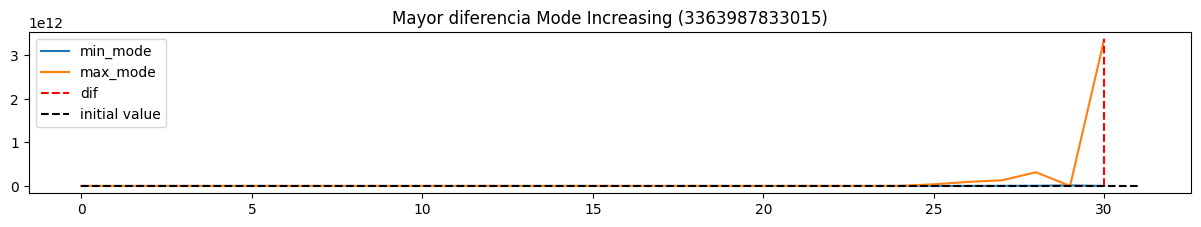

Median Increasing
max median - max mode: -2610740732588
max median - max mean: -397726798643
min medina - min mode: 15
min median - min mean: 0
min dif value in 30: 892058226
max dif value in 30: 753247100432


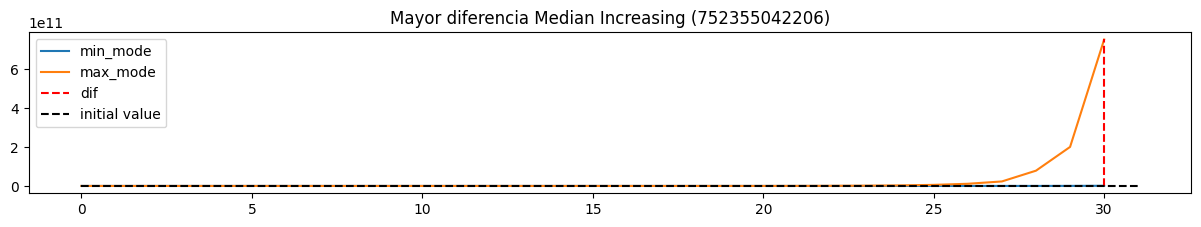

Mean Increasing
max mean - max median: 397726798643
max mean - max mode: -2213013933945
min mean - min median: 0
min mean - min mode: 15
min dif value in 30: 227109124
max dif value in 30: 1150973899075


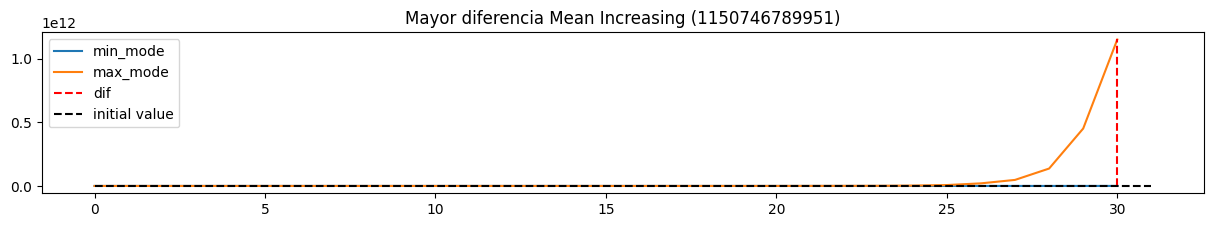

In [ ]:
matplotlib.rcParams['figure.figsize'] = [15,8]
max_mode_value = max(max_list_mode_inc)
min_mode_value = min(min_list_mode_inc)
max_median_value = max(max_list_median_inc)
min_median_value = min(min_list_median_inc)
max_mean_value = max(max_list_mean_inc)
min_mean_value = min(min_list_mean_inc)

plt.subplot2grid((11,1),(0,0),3,1)
print("Mode Increasing")
print("max mode - max median: " + str(max_mode_value - max_median_value))
print("max mode - max mean: " + str(max_mode_value - max_mean_value))
print("min mode - min median: " + str(min_mode_value - min_median_value))
print("min mode - min mean: " + str(min_mode_value - min_mean_value))
print("min dif value in " + str(max_index_mode_inc) + ": " + str(round(min_list_mode_inc[max_index_mode_inc],2)))
print("max dif value in " + str(max_index_mode_inc) + ": " + str(round(max_list_mode_inc[max_index_mode_inc],2)))
plot_dif(min_list_mode_inc,max_list_mode_inc,dif_mode_inc,max_index_mode_inc,20, title = "Mayor diferencia Mode Increasing")

plt.subplot2grid((11,1),(0,0),3,1)
print("Median Increasing")
print("max median - max mode: " + str(max_median_value - max_mode_value))
print("max median - max mean: " + str(max_median_value - max_mean_value))
print("min medina - min mode: " + str(min_median_value - min_mode_value))
print("min median - min mean: " + str(min_median_value - min_mean_value))
print("min dif value in " + str(max_index_median_inc) + ": " + str(round(min_list_median_inc[max_index_median_inc],2)))
print("max dif value in " + str(max_index_median_inc) + ": " + str(round(max_list_median_inc[max_index_median_inc],2)))
plot_dif(min_list_median_inc,max_list_median_inc,dif_median_inc,max_index_median_inc,20, title = "Mayor diferencia Median Increasing")

plt.subplot2grid((11,1),(0,0),3,1)
print("Mean Increasing")
print("max mean - max median: " + str(max_mean_value - max_median_value))
print("max mean - max mode: " + str(max_mean_value - max_mode_value))
print("min mean - min median: " + str(min_mean_value - min_median_value))
print("min mean - min mode: " + str(min_mean_value - min_mode_value))
print("min dif value in " + str(max_index_mean_inc) + ": " + str(round(min_list_mean_inc[max_index_mean_inc],2)))
print("max dif value in " + str(max_index_mean_inc) + ": " + str(round(max_list_mean_inc[max_index_mean_inc],2)))
plot_dif(min_list_mean_inc,max_list_mean_inc,dif_mean_inc,max_index_mean_inc,20, title = "Mayor diferencia Mean Increasing")


Como se puede analizar la diferencia para los que usan moda como referencia es mucho más pronunciada que con los que usan media y mediana y en esta simulación si se muestra una mejoría para los que usan mediana con respecto a los que usan media

Balanced

Mode Balanced
max mode - max median: 72090
max mode - max mean: 72088
min mode - min median: 0
min mode - min mean: 0
min dif value in 30: 5
max dif value in 30: 72111


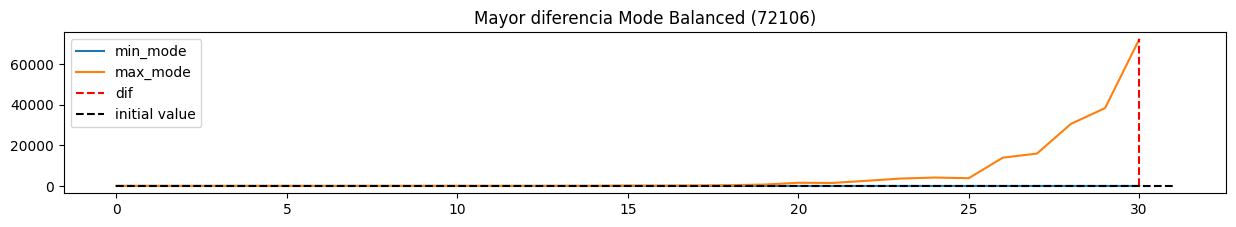

Median Balanced
max median - max mode: -72090
max median - max mean: -2
min medina - min mode: 0
min median - min mean: 0
min dif value in 5: 5
max dif value in 5: 21


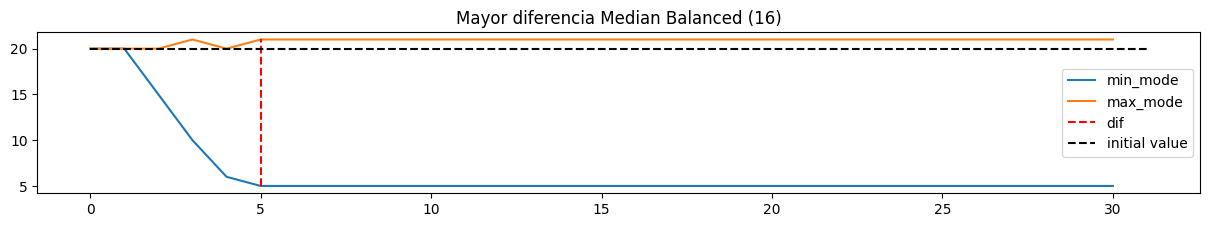

Mean Balanced
max mean - max median: 2
max mean - max mode: -72088
min mean - min median: 0
min mean - min mode: 0
min dif value in 7: 5
max dif value in 7: 23


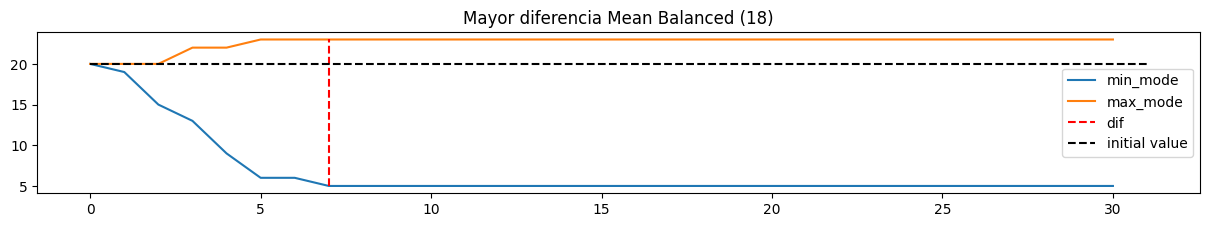

In [ ]:
matplotlib.rcParams['figure.figsize'] = [15,8]
max_mode_value = max(max_list_mode_bal)
min_mode_value = min(min_list_mode_bal)
max_median_value = max(max_list_median_bal)
min_median_value = min(min_list_median_bal)
max_mean_value = max(max_list_mean_bal)
min_mean_value = min(min_list_mean_bal)

plt.subplot2grid((11,1),(0,0),3,1)
print("Mode Balanced")
print("max mode - max median: " + str(max_mode_value - max_median_value))
print("max mode - max mean: " + str(max_mode_value - max_mean_value))
print("min mode - min median: " + str(min_mode_value - min_median_value))
print("min mode - min mean: " + str(min_mode_value - min_mean_value))
print("min dif value in " + str(max_index_mode_bal) + ": " + str(round(min_list_mode_bal[max_index_mode_bal],2)))
print("max dif value in " + str(max_index_mode_bal) + ": " + str(round(max_list_mode_bal[max_index_mode_bal],2)))
plot_dif(min_list_mode_bal,max_list_mode_bal,dif_mode_bal,max_index_mode_bal,20, title = "Mayor diferencia Mode Balanced")

plt.subplot2grid((11,1),(0,0),3,1)
print("Median Balanced")
print("max median - max mode: " + str(max_median_value - max_mode_value))
print("max median - max mean: " + str(max_median_value - max_mean_value))
print("min medina - min mode: " + str(min_median_value - min_mode_value))
print("min median - min mean: " + str(min_median_value - min_mean_value))
print("min dif value in " + str(max_index_median_bal) + ": " + str(round(min_list_median_bal[max_index_median_bal],2)))
print("max dif value in " + str(max_index_median_bal) + ": " + str(round(max_list_median_bal[max_index_median_bal],2)))
plot_dif(min_list_median_bal,max_list_median_bal,dif_median_bal,max_index_median_bal,20, title = "Mayor diferencia Median Balanced")

plt.subplot2grid((11,1),(0,0),3,1)
print("Mean Balanced")
print("max mean - max median: " + str(max_mean_value - max_median_value))
print("max mean - max mode: " + str(max_mean_value - max_mode_value))
print("min mean - min median: " + str(min_mean_value - min_median_value))
print("min mean - min mode: " + str(min_mean_value - min_mode_value))
print("min dif value in " + str(max_index_mean_bal) + ": " + str(round(min_list_mean_bal[max_index_mean_bal],2)))
print("max dif value in " + str(max_index_mean_bal) + ": " + str(round(max_list_mean_bal[max_index_mean_bal],2)))
plot_dif(min_list_mean_bal,max_list_mean_bal,dif_mean_bal,max_index_mean_bal,20, title = "Mayor diferencia Mean Balanced")


En este caso se puede ver como el valor converge y otra vez la mediana arroja discretamente mejores resultados

Staying

In [ ]:
matplotlib.rcParams['figure.figsize'] = [15,8]
max_mode_value = max(max_list_mode_stay)
min_mode_value = min(min_list_mode_stay)
max_median_value = max(max_list_median_stay)
min_median_value = min(min_list_median_stay)
max_mean_value = max(max_list_mean_stay)
min_mean_value = min(min_list_mean_stay)

plt.subplot2grid((11,1),(0,0),3,1)
print("Mode Staying")
print("max mode - max median: " + str(max_mode_value - max_median_value))
print("max mode - max mean: " + str(max_mode_value - max_mean_value))
print("min mode - min median: " + str(min_mode_value - min_median_value))
print("min mode - min mean: " + str(min_mode_value - min_mean_value))
print("min dif value in " + str(max_index_mode_stay) + ": " + str(round(min_list_mode_stay[max_index_mode_stay],2)))
print("max dif value in " + str(max_index_mode_stay) + ": " + str(round(max_list_mode_stay[max_index_mode_stay],2)))
plot_dif(min_list_mode_stay,max_list_mode_stay,dif_mode_stay,max_index_mode_stay,20, title = "Mayor diferencia Mode Staying")

plt.subplot2grid((11,1),(0,0),3,1)
print("Median Staying")
print("max median - max mode: " + str(max_median_value - max_mode_value))
print("max median - max mean: " + str(max_median_value - max_mean_value))
print("min medina - min mode: " + str(min_median_value - min_mode_value))
print("min median - min mean: " + str(min_median_value - min_mean_value))
print("min dif value in " + str(max_index_median_stay) + ": " + str(round(min_list_median_stay[max_index_median_stay],2)))
print("max dif value in " + str(max_index_median_stay) + ": " + str(round(max_list_median_stay[max_index_median_stay],2)))
plot_dif(min_list_median_stay,max_list_median_stay,dif_median_stay,max_index_median_stay,20, title = "Mayor diferencia Median Staying")

plt.subplot2grid((11,1),(0,0),3,1)
print("Mean Staying")
print("max mean - max median: " + str(max_mean_value - max_median_value))
print("max mean - max mode: " + str(max_mean_value - max_mode_value))
print("min mean - min median: " + str(min_mean_value - min_median_value))
print("min mean - min mode: " + str(min_mean_value - min_mode_value))
print("min dif value in " + str(max_index_mean_stay) + ": " + str(round(min_list_mean_stay[max_index_mean_stay],2)))
print("max dif value in " + str(max_index_mean_stay) + ": " + str(round(max_list_mean_stay[max_index_mean_stay],2)))
plot_dif(min_list_mean_stay,max_list_mean_stay,dif_mean_stay,max_index_mean_stay,20, title = "Mayor diferencia Mean Staying")


NameError: name 'max_list_mode_stay' is not defined

En este caso se puede apreciar como la mediana convergue a un valor mucho más rápido que las otras medidas y como la diferencia es considerablemente menor a las de las otras medidas. Tengase en cuenta que esta fue la mayor diferencia que se pudo alcanzar en 100 simulaciones

### Diferencia con el valor orignal
A continuación se va a realizar el segundo análisis que se realizó a la otra simulación, encontrar la simulación que más se alejó del valor original

Moda

In [ ]:
ori_nodes_mode_inc_list,ori_nodes_mode_inc_value,ori_nodes_mode_inc_index = get_max_dif_original(data_nodes_mode_increasing,20)


In [ ]:
ori_nodes_mode_bal_list,ori_nodes_mode_bal_value,ori_nodes_mode_bal_index = get_max_dif_original(data_nodes_balanced_mode,20)


In [ ]:
ori_nodes_mode_stay_list,ori_nodes_mode_stay_value,ori_nodes_mode_stay_index = get_max_dif_original(data_nodes_staying_mode,20)

Mediana

In [ ]:
ori_nodes_median_inc_list,ori_nodes_median_inc_value,ori_nodes_median_inc_index = get_max_dif_original(data_nodes_median_increasing,20)

In [ ]:
ori_nodes_median_bal_list,ori_nodes_median_bal_value,ori_nodes_median_bal_index = get_max_dif_original(data_nodes_median_balanced,20)

In [ ]:
ori_nodes_median_stay_list,ori_nodes_median_stay_value,ori_nodes_median_stay_index = get_max_dif_original(data_nodes_median_staying,20)

Media

In [ ]:
ori_nodes_mean_inc_list,ori_nodes_mean_inc_value,ori_nodes_mean_inc_index = get_max_dif_original(data_nodes_mean_increasing,20)


In [ ]:
ori_nodes_mean_bal_list,ori_nodes_mean_bal_value,ori_nodes_mean_bal_index = get_max_dif_original(data_nodes_mean_balanced,20)


In [ ]:
ori_nodes_mean_stay_list,ori_nodes_mean_stay_value,ori_nodes_mean_stay_index = get_max_dif_original(data_nodes_mean_staying,20)


Increasing

Mode Staying
max mode - max median: 2610740732588
max mode - max mean: 2213013933945
max dif in 30: 3363987833000


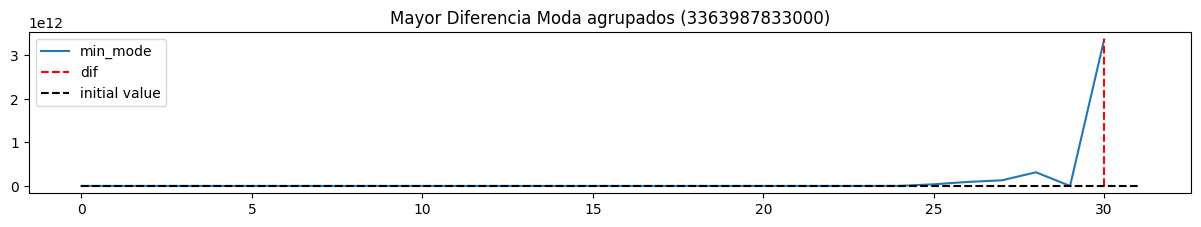

Median Increasing
max median - max mode: -2610740732588
max median - max mean: -397726798643
max dif in 30: 753247100412


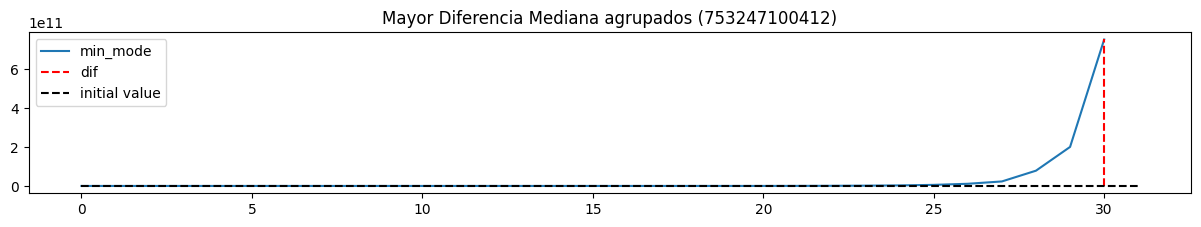

Mean Increasing
max mean - max median: 397726798643
max mean - max mode: -2213013933945
max dif in 30: 1150973899055


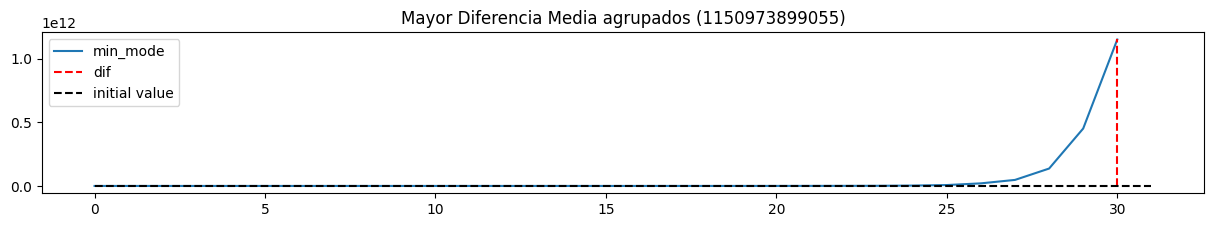

In [ ]:
matplotlib.rcParams['figure.figsize'] = [15,8]
max_mode_inc_dif_ori = max([abs(20 - price) for price in max_list_mode_inc] )
max_median_inc_dif_ori = max([abs(20 - price) for price in max_list_median_inc] )
max_mean_inc_dif_ori = max([abs(20 - price) for price in max_list_mean_inc] )


plt.subplot2grid((11,1),(0,0),3,1)
print("Mode Staying")
print("max mode - max median: " + str(max_mode_inc_dif_ori - max_median_inc_dif_ori))
print("max mode - max mean: " + str(max_mode_inc_dif_ori - max_mean_inc_dif_ori))
print("max dif in " + str(ori_nodes_mode_inc_index) + ": " + str(round(ori_nodes_mode_inc_value,2)))
plot_dif(ori_nodes_mode_inc_list,None,ori_nodes_mode_inc_value,ori_nodes_mode_inc_index,20, title = "Mayor Diferencia Moda agrupados")

plt.subplot2grid((11,1),(0,0),3,1)
print("Median Increasing")
print("max median - max mode: " + str(max_median_inc_dif_ori - max_mode_inc_dif_ori))
print("max median - max mean: " + str(max_median_inc_dif_ori - max_mean_inc_dif_ori))
print("max dif in " + str(ori_nodes_median_inc_index) + ": " + str(round(ori_nodes_median_inc_value,2)))
plot_dif(ori_nodes_median_inc_list,None,ori_nodes_median_inc_value,ori_nodes_median_inc_index,20, title = "Mayor Diferencia Mediana agrupados")


plt.subplot2grid((11,1),(0,0),3,1)
print("Mean Increasing")
print("max mean - max median: " + str(max_mean_inc_dif_ori - max_median_inc_dif_ori))
print("max mean - max mode: " + str(max_mean_inc_dif_ori - max_mode_inc_dif_ori))
print("max dif in " + str(ori_nodes_mean_inc_index) + ": " + str(round(ori_nodes_mean_inc_value,2)))
plot_dif(ori_nodes_mean_inc_list,None,ori_nodes_mean_inc_value,ori_nodes_mean_inc_index,20, title = "Mayor Diferencia Media agrupados")



La mediana sigue arrojando los mejores resultados

Balanced

In [ ]:
matplotlib.rcParams['figure.figsize'] = [15,8]
max_mode_dif_ori = max([abs(20 - price) for price in max_list_mode_bal] )
max_median_dif_ori = max([abs(20 - price) for price in max_list_median_bal] )
max_mean_dif_ori = max([abs(20 - price) for price in max_list_mean_bal] )


plt.subplot2grid((11,1),(0,0),3,1)
print("Mode Staying")
print("max mode - max median: " + str(max_mode_dif_ori - max_median_dif_ori))
print("max mode - max mean: " + str(max_mode_dif_ori - max_mean_dif_ori))
print("max dif in " + str(ori_nodes_mode_bal_index) + ": " + str(round(ori_nodes_mode_bal_value,2)))
plot_dif(ori_nodes_mode_bal_list,None,ori_nodes_mode_bal_value,ori_nodes_mode_bal_index,20, title = "Mayor Diferencia Moda")

plt.subplot2grid((11,1),(0,0),3,1)
print("Median Staying")
print("max median - max mode: " + str(max_median_dif_ori - max_mode_dif_ori))
print("max median - max mean: " + str(max_median_dif_ori - max_mean_dif_ori))
print("max dif in " + str(ori_nodes_median_bal_index) + ": " + str(round(ori_nodes_median_bal_value,2)))
plot_dif(ori_nodes_median_bal_list,None,ori_nodes_median_bal_value,ori_nodes_median_bal_index,20, title = "Mayor Diferencia Mediana")


plt.subplot2grid((11,1),(0,0),3,1)
print("Mean Staying")
print("max mean - max median: " + str(max_mean_dif_ori - max_median_dif_ori))
print("max mean - max mode: " + str(max_mean_dif_ori - max_mode_dif_ori))
print("max dif in " + str(ori_nodes_mean_bal_index) + ": " + str(round(ori_nodes_mean_bal_value,2)))
plot_dif(ori_nodes_mean_bal_list,None,ori_nodes_mean_bal_value,ori_nodes_mean_bal_index,20, title = "Mayor Diferencia Media")



NameError: name 'matplotlib' is not defined

Staying

Mode Staying
max ori dif mode: 15
max mode - max median: 12
max mode - max mean: 0
max dif in 16: 15


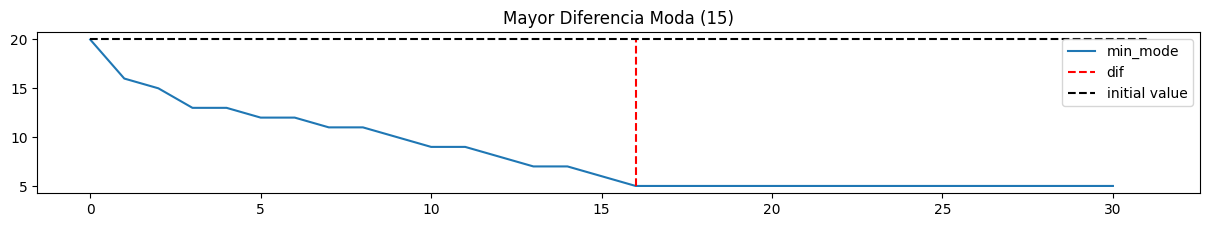

Median Staying
max ori dif median: 3
max median - max mode: -12
max median - max mean: -12
max dif in 3: 3


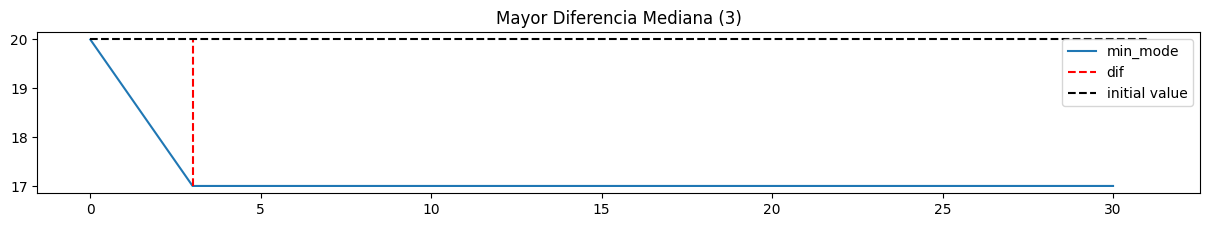

Mean Staying
max ori dif mean: 15
max mean - max median: 12
max mean - max mode: 0
max dif in 27: 15


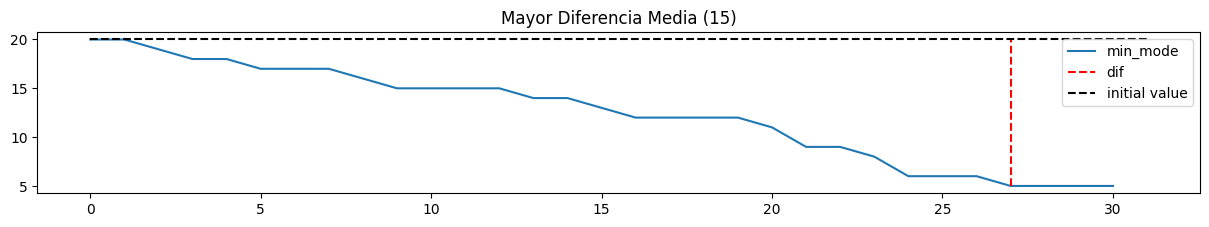

In [ ]:
matplotlib.rcParams['figure.figsize'] = [15,8]


plt.subplot2grid((11,1),(0,0),3,1)
print("Mode Staying")
print("max ori dif mode: " + str(ori_nodes_mode_stay_value))
print("max mode - max median: " + str(ori_nodes_mode_stay_value - ori_nodes_median_stay_value))
print("max mode - max mean: " + str(ori_nodes_mode_stay_value - ori_nodes_mean_stay_value))
print("max dif in " + str(ori_nodes_mode_stay_index) + ": " + str(round(ori_nodes_mode_stay_value,2)))
plot_dif(ori_nodes_mode_stay_list,None,ori_nodes_mode_stay_value,ori_nodes_mode_stay_index,20, title = "Mayor Diferencia Moda")

plt.subplot2grid((11,1),(0,0),3,1)
print("Median Staying")
print("max ori dif median: " + str(ori_nodes_median_stay_value))
print("max median - max mode: " + str(ori_nodes_median_stay_value - ori_nodes_mode_stay_value))
print("max median - max mean: " + str(ori_nodes_median_stay_value - ori_nodes_mean_stay_value))
print("max dif in " + str(ori_nodes_median_stay_index) + ": " + str(round(ori_nodes_median_stay_value,2)))
plot_dif(ori_nodes_median_stay_list,None,ori_nodes_median_stay_value,ori_nodes_median_stay_index,20, title = "Mayor Diferencia Mediana")


plt.subplot2grid((11,1),(0,0),3,1)
print("Mean Staying")
print("max ori dif mean: " + str(ori_nodes_mean_stay_value))
print("max mean - max median: " + str(ori_nodes_mean_stay_value - ori_nodes_median_stay_value))
print("max mean - max mode: " + str(ori_nodes_mean_stay_value - ori_nodes_mode_stay_value))
print("max dif in " + str(ori_nodes_mean_stay_index) + ": " + str(round(ori_nodes_mean_stay_value,2)))
plot_dif(ori_nodes_mean_stay_list,None,ori_nodes_mean_stay_value,ori_nodes_mean_stay_index,20, title = "Mayor Diferencia Media")



## Conclusión 

De ambos experimentos se puede concluir que utilizar la moda como referencia arroja resultados más bruscos y que la mediana es la que más suaviza el cambio